In [2]:
from google.colab import files
uploaded = files.upload()


In [8]:
import zipfile
import os

with zipfile.ZipFile("TrashType_Image_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("garbage_data")

os.listdir("garbage_data")

['__MACOSX', 'TrashType_Image_Dataset']

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/garbage_data/TrashType_Image_Dataset"

img_height = 224
img_width = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # Use 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


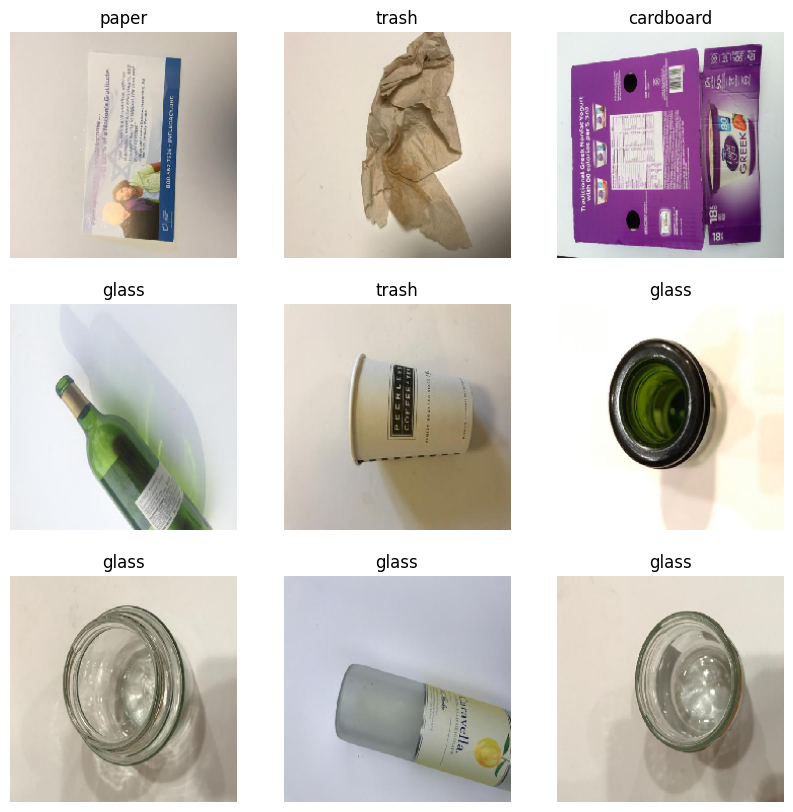

In [15]:
class_names = list(train_generator.class_indices.keys())

# Show a few images with labels
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define input shape properly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 244s 4s/step - accuracy: 0.2595 - loss: 2.0301 - val_accuracy: 0.4652 - val_loss: 1.3577
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.4453 - loss: 1.3701 - val_accuracy: 0.5527 - val_loss: 1.1807
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.5309 - loss: 1.1679 - val_accuracy: 0.5964 - val_loss: 1.1249
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.6447 - loss: 0.9681 - val_accuracy: 0.6004 - val_loss: 1.1447
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.7164 - loss: 0.7729 - val_accuracy: 0.6024 - val_loss: 1.1536
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.8150 - loss: 0.5523 - val_accuracy: 0.6123 - val_loss: 1.2456
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.8487 - loss: 0.4266 - val_accuracy: 0.6421 - val_loss: 1.2945
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.9097 - loss: 0.2898 - val_accuracy: 0.6024 - v

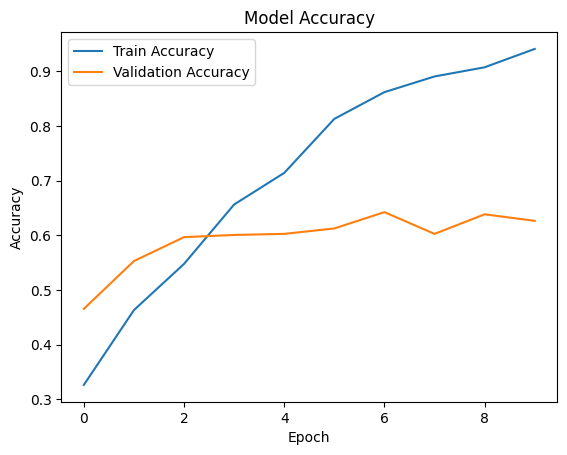

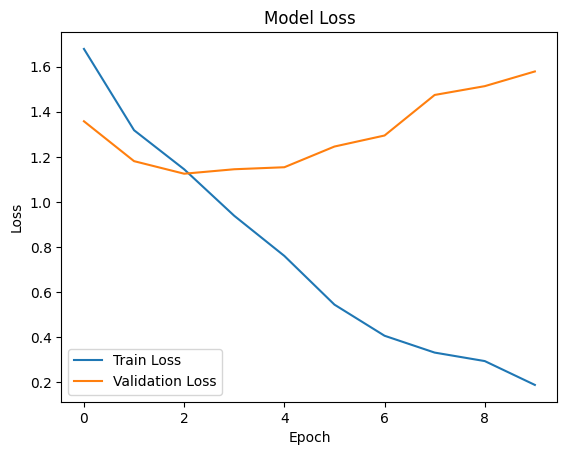

In [21]:
# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
